In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
import matplotlib.image as mpimg
import qrcode

In [2]:
# creating the pentagon
deg = np.pi/180
v0 = np.array([0,1])
v1 = np.array([np.cos(18*deg),np.sin(18*deg)])
v2 = np.array([np.cos(54*deg),-np.sin(54*deg)])
v3 = np.array([-np.cos(54*deg),-np.sin(54*deg)])
v4 = np.array([-np.cos(18*deg),np.sin(18*deg)])

In [3]:
fontsize= 16
ticksize = 14
figsize = (10, 10)
params = {"text.usetex": True,
    'font.family':'monospace',
    "figure.figsize":figsize, 
    'figure.dpi': 200,
    'figure.edgecolor': 'k',
    'font.size': fontsize, 
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params) 

#### Generating the initial random point inside the pentagon

In [4]:
def random_point_in_pentagon(v0, v1, v2, v3, v4):
    # Generate 3 random numbers between 0 and 1
    r0, r1, r2, r3, r4 = np.random.random(), np.random.random(), np.random.random(), np.random.random(), np.random.random()
    # Normalize them
    s0 = r0/(r0+ r1 + r2 + r3 + r4)
    s1 = r1/(r0+ r1 + r2 + r3 + r4)
    s2 = r2/(r0+ r1 + r2 + r3 + r4)
    s3 = r3/(r0+ r1 + r2 + r3 + r4)
    s4 = r4/(r0+ r1 + r2 + r3 + r4)
    # Using random convex combination 
    x = s0 * v0[0] + s1 * v1[0] + s2 * v2[0] + s3 * v3[0] + s4 * v4[0]
    y = s0 * v0[1] + s1 * v1[1] + s2 * v2[1] + s3 * v3[1] + s4 * v4[1]
    
    return np.array([x, y])

In [5]:
v_x = np.array([v0[0],v1[0],v2[0],v3[0],v4[0],v0[0]])
v_y = np.array([v0[1],v1[1],v2[1],v3[1],v4[1],v0[1]])

#### Plotting the pentagon and the random initial point

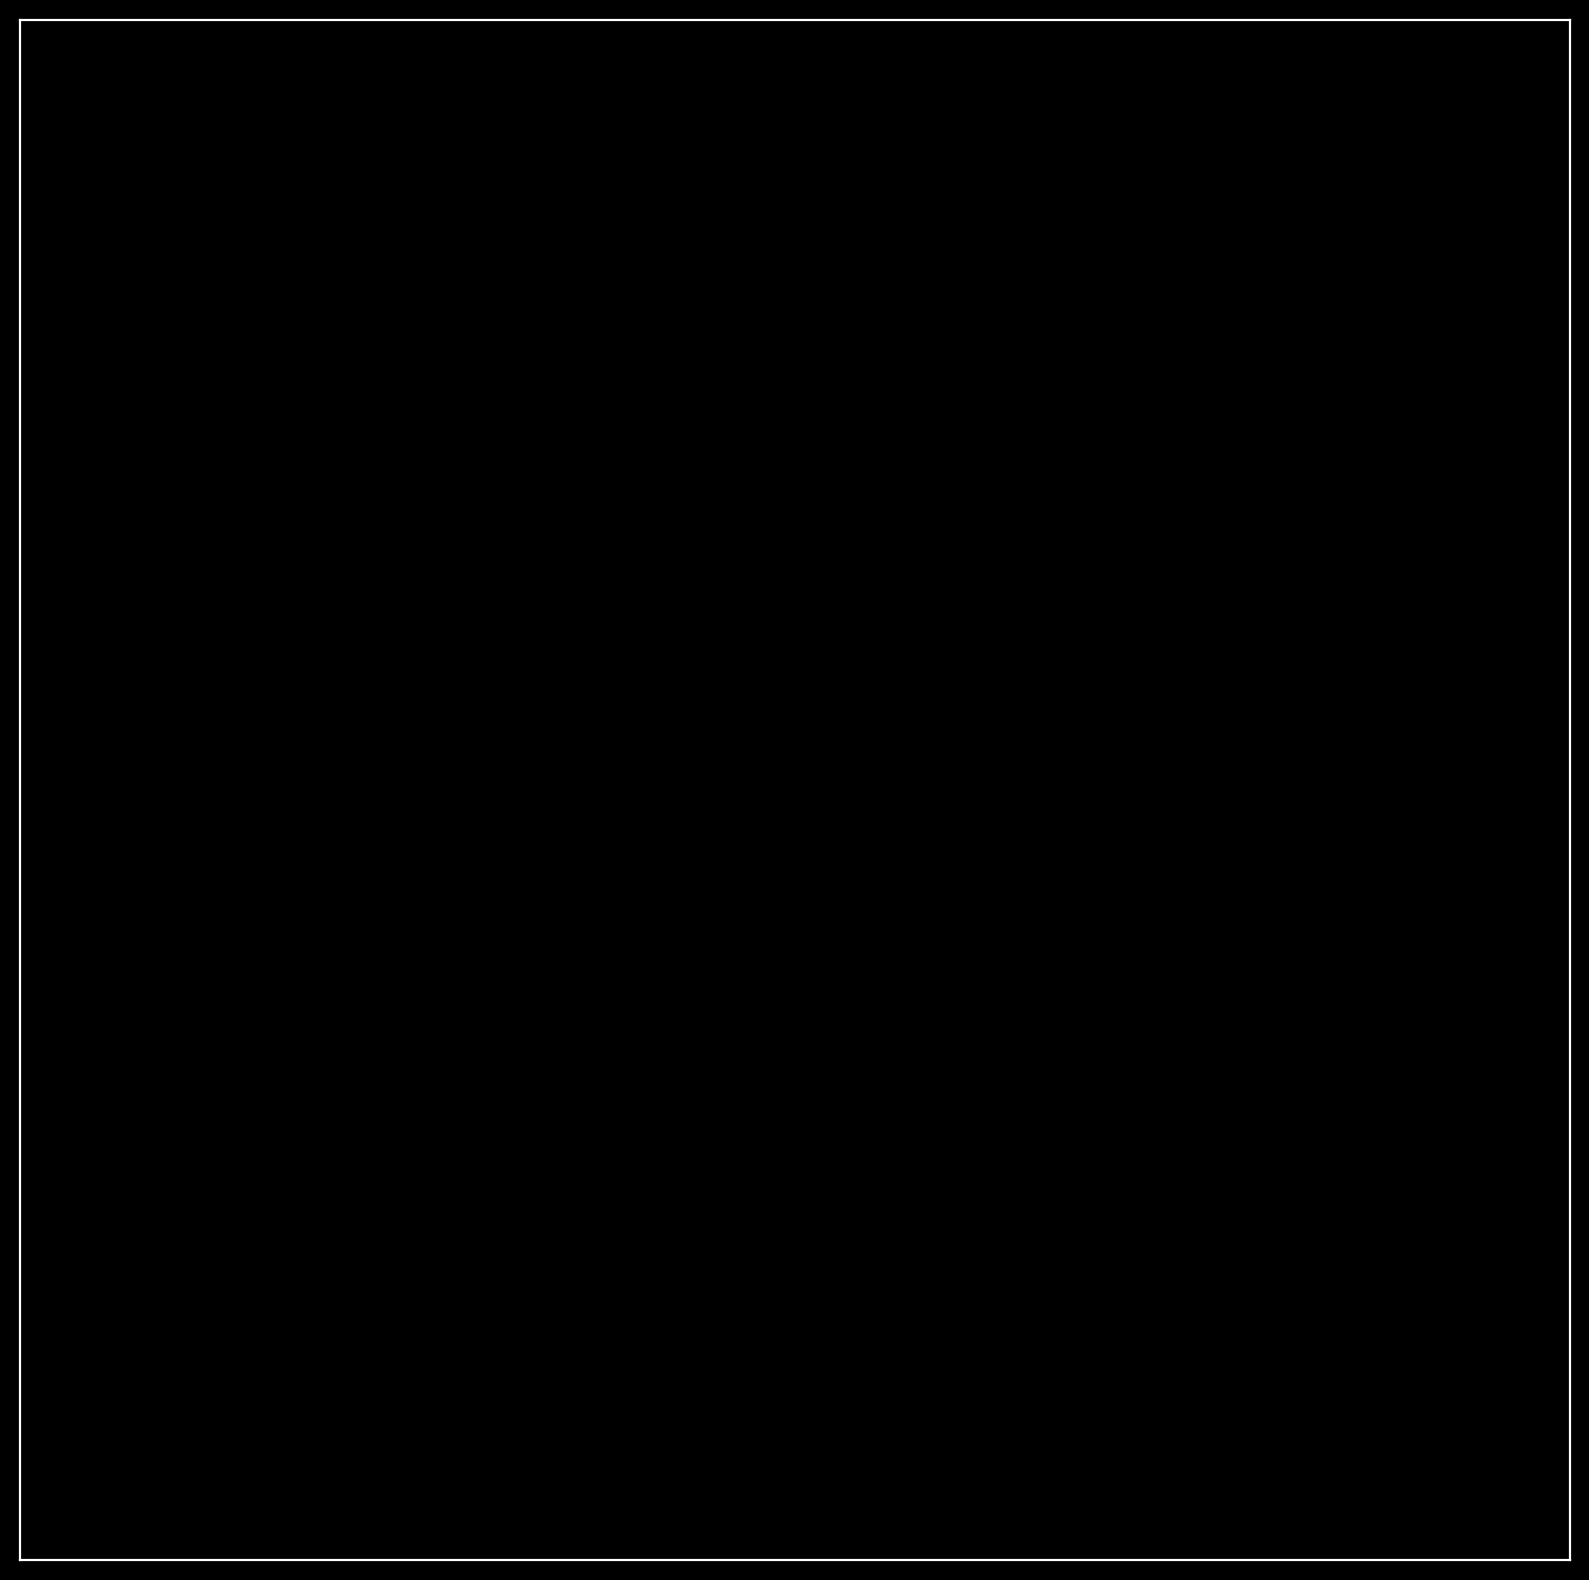

In [6]:
plt.style.use('dark_background')

initial_point = random_point_in_pentagon(v0, v1, v2, v3, v4)
plt.plot(v_x, v_y, color = 'k')
plt.scatter(initial_point[0],initial_point[1], color = 'k', s=10)
plt.xlim(min(v_x)-0.1, max(v_x)+0.1)
plt.ylim(min(v_y)-0.1, max(v_y)+0.1)
plt.tick_params(axis='both', which='both', length=0)
plt.xticks([])
plt.yticks([]);

#### Writing a function that randomly chooses the vertices: the previous one is not allowed to be chosen

In [7]:
def vertex_choose(N):
    vertices_chosen = np.array([])
    vertex_list = [0,1,2,3,4]
    for i in range(N):
        if i== 0:
            vertex_now = np.random.randint(5)
            vertices_chosen = np.append(vertices_chosen,vertex_now)
            vertices = vertex_list.copy()
            vertices.remove(vertex_now)
        else:
            vertex_now_index = np.random.randint(4)
            vertex_now = vertices[vertex_now_index]
            vertices_chosen = np.append(vertices_chosen,vertex_now)
            vertices = vertex_list.copy()
            vertices.remove(vertex_now)
    
    return vertices_chosen
    

#### Writing the petangon chaos game for arbitrary N

In [8]:
vertices_x= np.array([v0[0],v1[0],v2[0],v3[0],v4[0]])
vertices_y = np.array([v0[1],v1[1],v2[1],v3[1],v4[1]])
initial_point = random_point_in_pentagon(v0, v1, v2, v3, v4)

In [9]:
def pentagon_points(N, initial_point):
    points_x = np.array([])
    points_y = np.array([])
    vertices_chosen = vertex_choose(N+1)
    
    firt_vertex_index = int(vertices_chosen[0])
    first_vertex_coordinate = np.array([vertices_x[firt_vertex_index], vertices_y[firt_vertex_index]])
    first_point = 0.5* (initial_point+ first_vertex_coordinate) 
    points_x = np.append(points_x,first_point[0])
    points_y = np.append(points_y,first_point[1])
    
    for i in range(N):
        new_init_point_x = points_x[i] #choosing the x coordinate of the last point
        new_init_point_y = points_y[i] #choosing the y coordinate of the last point
        new_vertex_number = int(vertices_chosen[i+1]) # Choosing a new random vertex number
        new_point_x = 0.5*(new_init_point_x + vertices_x[new_vertex_number]) # creating a new point x coordinate
        new_point_y = 0.5*(new_init_point_y + vertices_y[new_vertex_number]) # creating a new point y coordinate
        
        points_x = np.append(points_x,new_point_x)
        points_y = np.append(points_y,new_point_y)
    
    
    return points_x, points_y, vertices_chosen
        

#### Plotting the results

In [10]:
x_points , y_points, vertices = pentagon_points(100000, initial_point)

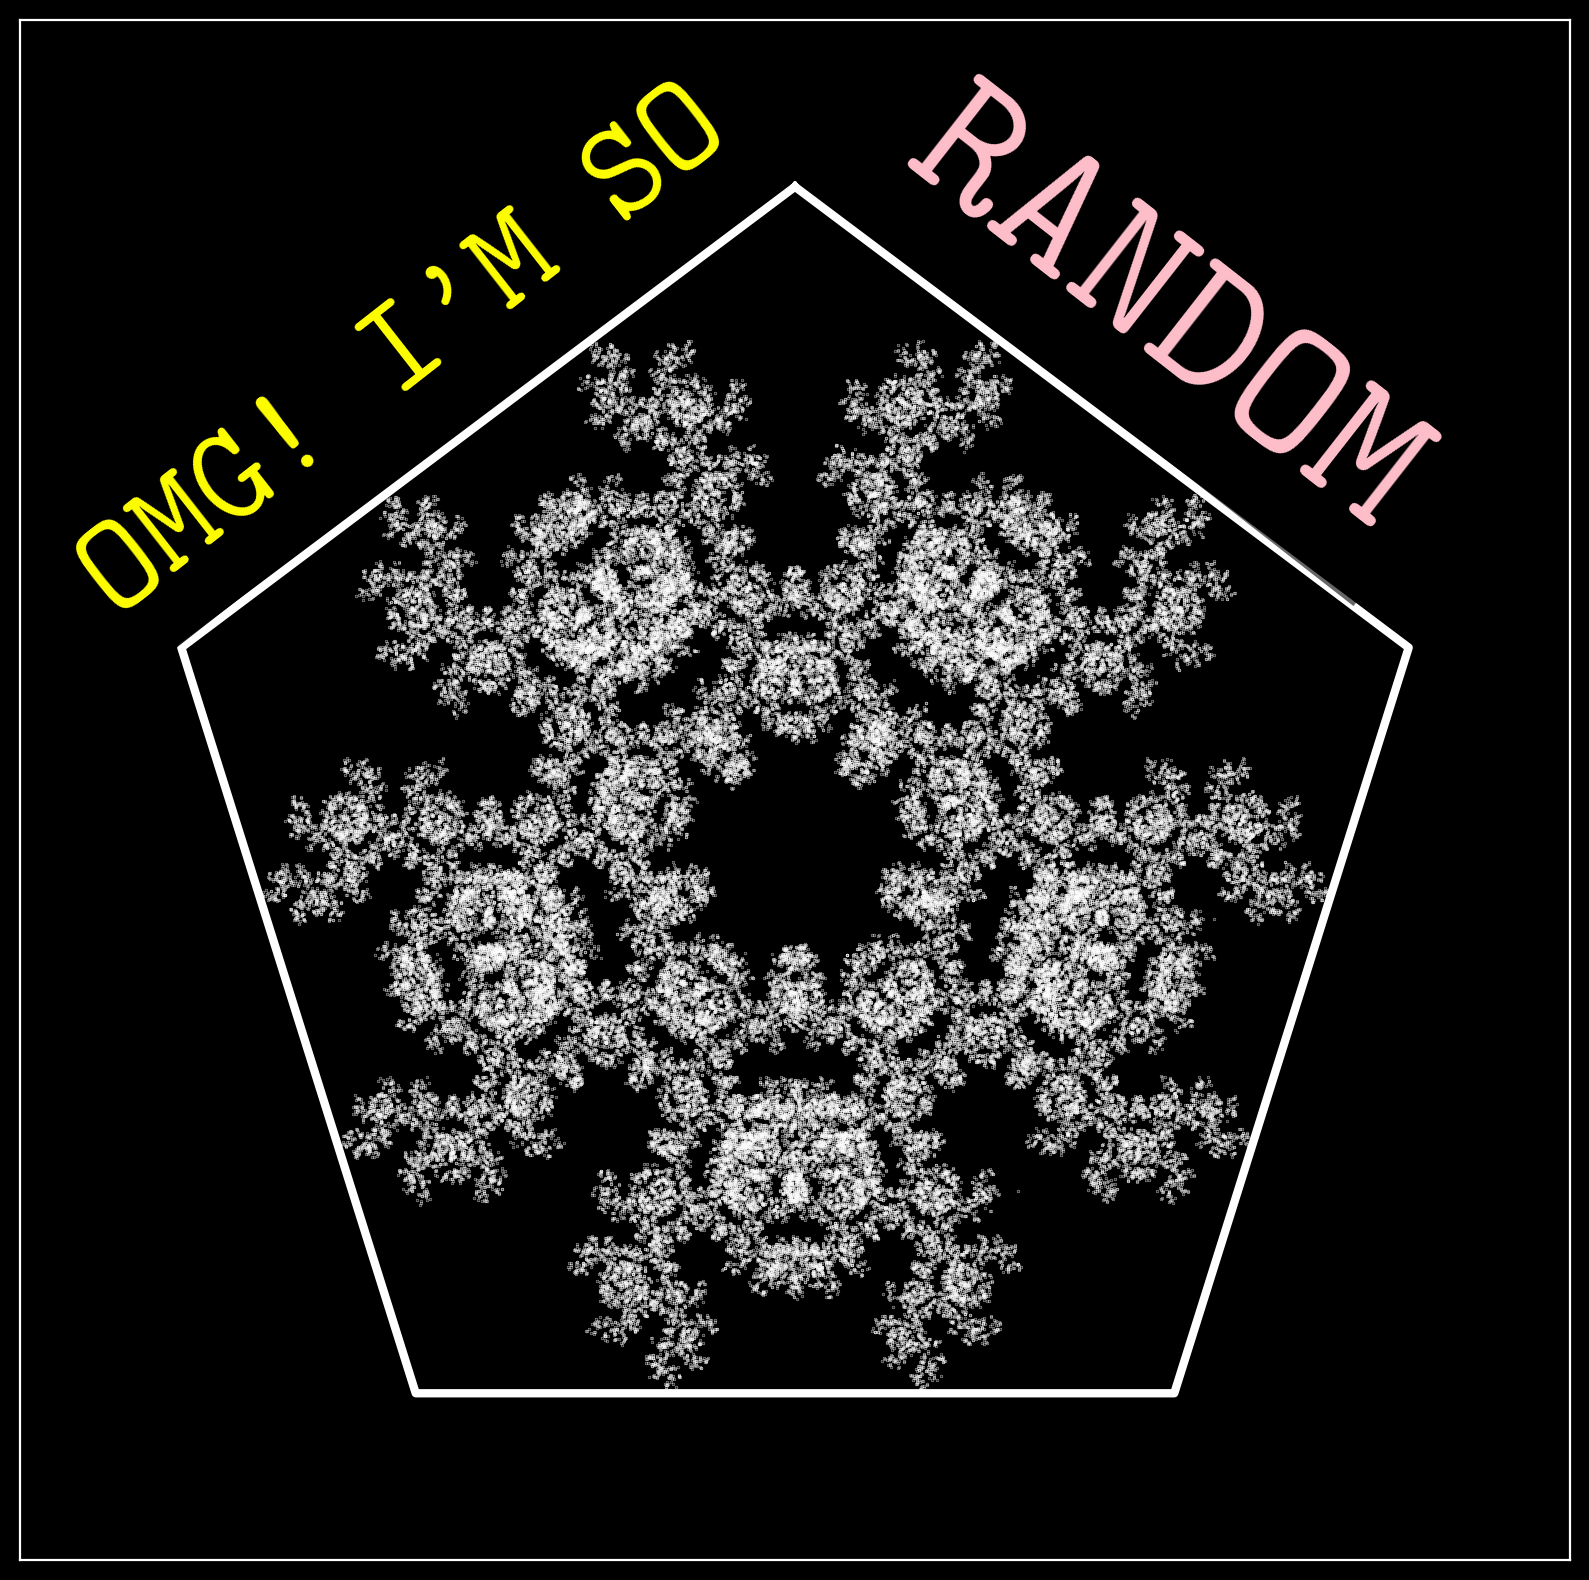

In [11]:
plt.style.use('dark_background')
plt.plot(v_x, v_y, color = 'w', linewidth=3)
plt.scatter(x_points,y_points, color = 'w', s=0.02)
plt.xlim(min(v_x)-0.25, max(v_x)+0.25)
plt.ylim(min(v_y)-0.25, max(v_y)+0.25)
plt.tick_params(axis='both', which='both', length=0)
plt.xticks([])
plt.yticks([]);

plt.text(-0.59, 0.75, "OMG! I'M SO", fontsize=50, color='yellow', weight='bold',
         horizontalalignment='center', verticalalignment='center',
         bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10, 'edgecolor': 'none'}, rotation=38)

plt.text(0.57, 0.80, "RANDOM", fontsize=70, color='pink', weight='bold',
         horizontalalignment='center', verticalalignment='center',
         bbox={'facecolor': 'black', 'alpha': 0.6, 'pad': 10, 'edgecolor': 'none'}, rotation=-38);

#### Creating the QR Code

In [12]:
# Link for website
import qrcode

input_data = "https://github.com/Mekahou/Fun-Stuff/blob/main/codes/chaos_game_pentagon/pentagon_choas_game.ipynb"#Creating an instance of qrcode
# Link for website

qr = qrcode.QRCode(
        version=1,
        box_size=10,
        border=5)

qr.add_data(input_data)

qr.make(fit=True)
img = qr.make_image(fill='black', back_color='white')

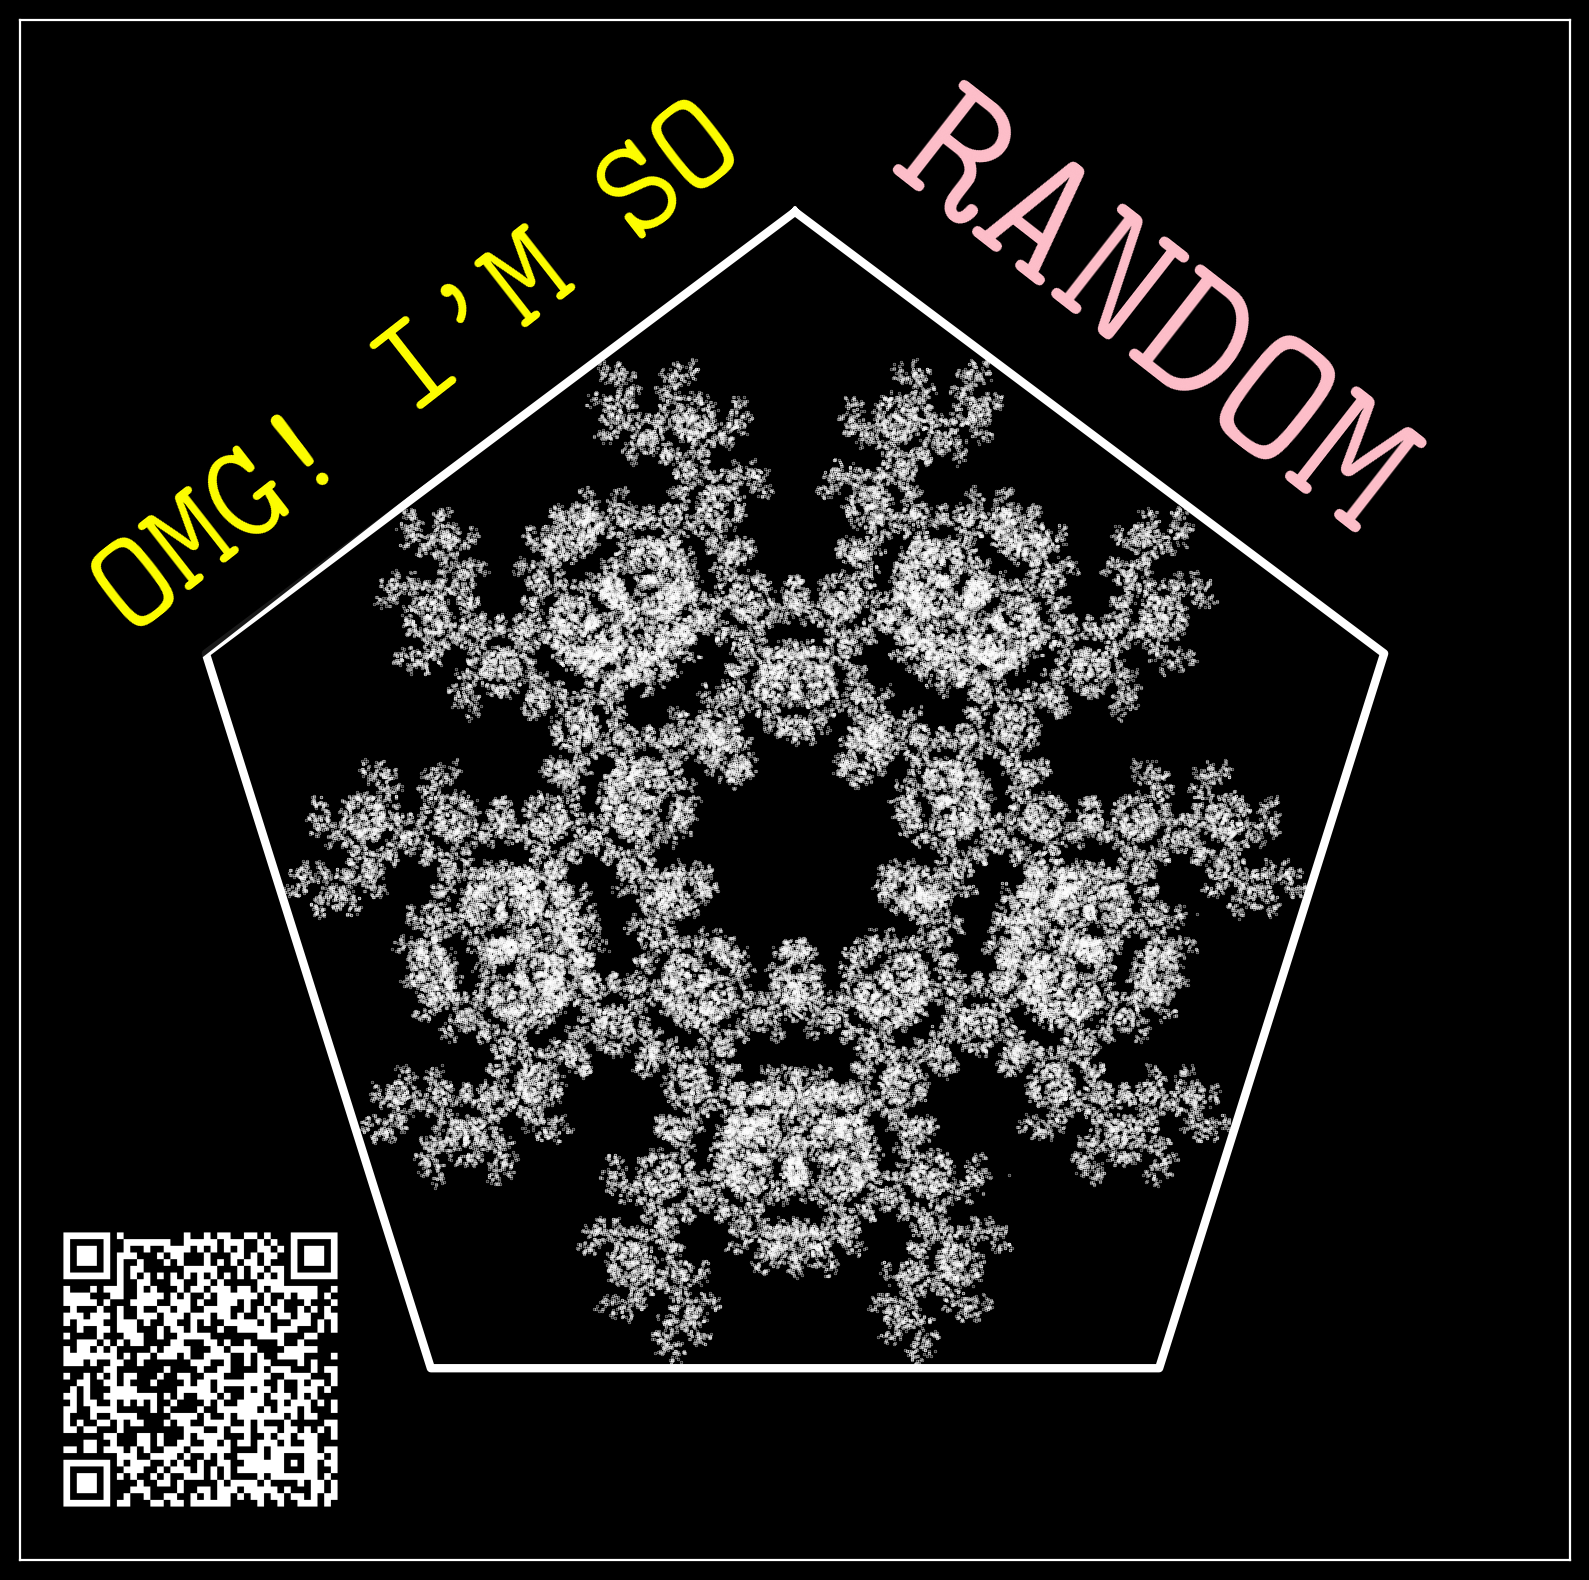

In [13]:
plt.style.use('dark_background')
plt.plot(v_x, v_y, color='w', linewidth=3)
plt.scatter(x_points, y_points, color='w', s=0.02)
plt.xlim(min(v_x)-0.3, max(v_x)+0.3)
plt.ylim(min(v_y)-0.3, max(v_y)+0.3)
plt.tick_params(axis='both', which='both', length=0)
plt.xticks([])
plt.yticks([])

# Add the text
plt.text(-0.59, 0.75, "OMG! I'M SO", fontsize=50, color='yellow', weight='bold',
         horizontalalignment='center', verticalalignment='center',
         bbox={'facecolor': 'black', 'alpha': 0.9, 'pad': 10, 'edgecolor': 'none'}, rotation=38)
plt.text(0.57, 0.82, "RANDOM", fontsize=70, color='pink', weight='bold',
         horizontalalignment='center', verticalalignment='center',
         bbox={'facecolor': 'black', 'alpha': 0.6, 'pad': 10, 'edgecolor': 'none'}, rotation=-38)

# Add the image as a box
fig = plt.gcf()
ax = fig.add_axes([0.13, 0.12, 0.17, 0.17])  # [left, bottom, width, height]ax.imshow(img, facecolor='white')  # set the facecolor to white
ax.imshow(img, cmap='binary')  # set the facecolor to white
ax.axis('off')

plt.show()